In [1]:
import geopandas as gpd 

In [3]:
fields_cx = gpd.read_file("fields_cropped.shp")

In [4]:
fields_cx

,category,gewas,gewascode,jaar,status,geometry
0,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((119676.580 500347.036, 119688.039 50..."
1,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((120631.197 499818.532, 120595.295 49..."
2,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((121237.209 499189.398, 121228.989 49..."
3,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((121424.388 499918.068, 121423.197 49..."
4,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((121418.811 499800.479, 121425.512 49..."
...,...,...,...,...,...,...
4867,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((133630.043 493290.582, 133624.619 49..."
4868,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((133572.822 493095.040, 133573.087 49..."
4869,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((133480.387 493404.176, 133477.559 49..."
4870,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((135049.220 496062.653, 135108.486 49..."


In [5]:
fields_cx["category"].unique()

array(['Grasland', 'Bouwland', 'Natuurterrein', 'Overige'], dtype=object)

In [6]:
fields_cx["gewascode"].unique()

array([ 265,  266,  332,  863,  259,  331,  335,  236,  257,  515, 1936,
       2793,  343])

In [7]:
import rioxarray

In [8]:
ndvi = rioxarray.open_rasterio("NDVI.tif")

In [9]:
ndvi

<xarray.DataArray (band: 1, y: 1000, x: 1000)>
[1000000 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 6.29e+05 6.29e+05 6.29e+05 ... 6.39e+05 6.39e+05
  * y            (y) float64 5.814e+06 5.814e+06 ... 5.804e+06 5.804e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

In [10]:
fields_cx[fields_cx["gewascode"]==265]

,category,gewas,gewascode,jaar,status,geometry
0,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((119676.580 500347.036, 119688.039 50..."
1,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((120631.197 499818.532, 120595.295 49..."
2,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((121237.209 499189.398, 121228.989 49..."
3,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((121424.388 499918.068, 121423.197 49..."
4,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((121418.811 499800.479, 121425.512 49..."
...,...,...,...,...,...,...
4866,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((133528.310 493313.866, 133525.797 49..."
4867,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((133630.043 493290.582, 133624.619 49..."
4868,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((133572.822 493095.040, 133573.087 49..."
4869,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((133480.387 493404.176, 133477.559 49..."


In [11]:
from rasterio import features

In [12]:
features.rasterize?

Signature:
features.rasterize(
    shapes,
    out_shape=None,
    fill=0,
    out=None,
    transform=Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0),
    all_touched=False,
    merge_alg=<MergeAlg.replace: 'REPLACE'>,
    default_value=1,
    dtype=None,
)
Docstring:
Return an image array with input geometries burned in.

Warnings will be raised for any invalid or empty geometries, and
an exception will be raised if there are no valid shapes
to rasterize.

Parameters
----------
shapes : iterable of (`geometry`, `value`) pairs or geometries
    The `geometry` can either be an object that implements the geo
    interface or GeoJSON-like object. If no `value` is provided
    the `default_value` will be used. If `value` is `None` the
    `fill` value will be used.
out_shape : tuple or list with 2 integers
    Shape of output numpy ndarray.
fill : int or float, optional
    Used as fill value for all areas not covered by input
    geometries.
out : numpy ndarray, optional
    Array of same sh

In [13]:
fields_cx.crs

<Projected CRS: EPSG:28992>
Name: Amersfoort / RD New
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Netherlands - onshore, including Waddenzee, Dutch Wadden Islands and 12-mile offshore coastal zone.
- bounds: (3.2, 50.75, 7.22, 53.7)
Coordinate Operation:
- name: RD New
- method: Oblique Stereographic
Datum: Amersfoort
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

In [14]:
ndvi.rio.crs

CRS.from_epsg(32631)

In [15]:
fields_cx = fields_cx.to_crs(ndvi.rio.crs)

In [21]:
# create a list like this[[geom1, code1], [geom2, code2]]
geom_list = fields_cx[['geometry', 'gewascode']].values.tolist()

In [26]:
ndvi_squeezed = ndvi.squeeze()

In [27]:
ndvi_squeezed

<xarray.DataArray (y: 1000, x: 1000)>
array([[ 0.650207,  0.798966,  0.765138, ...,  0.256525,  0.447802,  0.496236],
       [ 0.770525,  0.785489,  0.726908, ...,  0.37287 ,  0.510473,  0.484058],
       [ 0.777107,  0.729597,  0.70504 , ...,  0.483602,  0.522084,  0.470675],
       ...,
       [ 0.151329,  0.141291,  0.19685 , ..., -0.372822, -0.337143, -0.36954 ],
       [ 0.145464,  0.151936,  0.157895, ..., -0.359629, -0.345029, -0.365116],
       [ 0.18618 , -0.032882,  0.125714, ..., -0.35446 , -0.35689 , -0.344379]],
      dtype=float32)
Coordinates:
    band         int64 1
  * x            (x) float64 6.29e+05 6.29e+05 6.29e+05 ... 6.39e+05 6.39e+05
  * y            (y) float64 5.814e+06 5.814e+06 ... 5.804e+06 5.804e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

In [30]:
fields_rasterized = features.rasterize(geom_list, 
                                       out_shape=ndvi_squeezed.shape, 
                                       transform=ndvi.rio.transform())

In [25]:
ndvi

<xarray.DataArray (band: 1, y: 1000, x: 1000)>
array([[[ 0.650207,  0.798966, ...,  0.447802,  0.496236],
        [ 0.770525,  0.785489, ...,  0.510473,  0.484058],
        ...,
        [ 0.145464,  0.151936, ..., -0.345029, -0.365116],
        [ 0.18618 , -0.032882, ..., -0.35689 , -0.344379]]], dtype=float32)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 6.29e+05 6.29e+05 6.29e+05 ... 6.39e+05 6.39e+05
  * y            (y) float64 5.814e+06 5.814e+06 ... 5.804e+06 5.804e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

In [31]:
fields_rasterized

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

In [34]:
fields_rasterized_xarr =  ndvi_squeezed.copy()

In [35]:
fields_rasterized_xarr.data = fields_rasterized

In [36]:
fields_rasterized_xarr

<xarray.DataArray (y: 1000, x: 1000)>
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)
Coordinates:
    band         int64 1
  * x            (x) float64 6.29e+05 6.29e+05 6.29e+05 ... 6.39e+05 6.39e+05
  * y            (y) float64 5.814e+06 5.814e+06 ... 5.804e+06 5.804e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

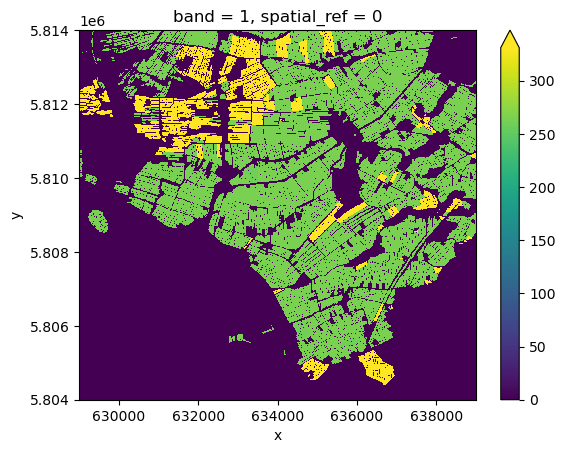

In [45]:
fields_rasterized_xarr.plot(robust=True)

In [38]:
from xrspatial import zonal_stats

In [39]:
zonal_stats?

Signature:
zonal_stats(
    zones: xarray.core.dataarray.DataArray,
    values: xarray.core.dataarray.DataArray,
    zone_ids: Optional[List[Union[int, float]]] = None,
    stats_funcs: Union[Dict, List] = ['mean', 'max', 'min', 'sum', 'std', 'var', 'count'],
    nodata_values: Union[int, float] = None,
    return_type: str = 'pandas.DataFrame',
) -> Union[pandas.core.frame.DataFrame, dask.dataframe.core.DataFrame, xarray.core.dataarray.DataArray]
Docstring:
Calculate summary statistics for each zone defined by a `zones`
dataset, based on `values` aggregate.

A single output value is computed for every zone in the input `zones`
dataset.

This function currently supports numpy backed, and dask with numpy backed
xarray DataArrays.

Parameters
----------
zones : xr.DataArray
    zones is a 2D xarray DataArray of numeric values.
    A zone is all the cells in a raster that have the same value,
    whether or not they are contiguous. The input `zones` raster defines
    the shape, values, a

In [46]:
fields_rasterized_xarr.shape

(1000, 1000)

In [47]:
ndvi_squeezed.shape

(1000, 1000)

In [40]:
results_stats = zonal_stats(fields_rasterized_xarr, ndvi_squeezed)

In [43]:
type(results_stats)

pandas.core.frame.DataFrame

In [42]:
results_stats

,zone,mean,max,min,sum,std,var,count
0,0,0.291683,0.999435,-0.998357,170186.250000,0.355448,0.126343,583463.0
1,259,0.519781,0.893031,0.202402,1768.814697,0.109469,0.011984,3403.0
2,265,0.781536,0.959217,0.138824,268275.406250,0.091291,0.008334,343267.0
3,266,0.798432,0.925953,0.448120,4178.992188,0.075825,0.005749,5234.0
4,331,0.710946,0.910625,0.155107,43253.261719,0.102585,0.010524,60839.0
5,332,0.700648,0.861245,0.308974,1306.007202,0.109584,0.012009,1864.0
6,335,0.654265,0.883563,0.241567,1252.917725,0.148430,0.022032,1915.0
7,863,0.478134,0.719927,0.248347,7.172009,0.177491,0.031503,15.0


In [48]:
ndvi_squeezed

<xarray.DataArray (y: 1000, x: 1000)>
array([[ 0.650207,  0.798966,  0.765138, ...,  0.256525,  0.447802,  0.496236],
       [ 0.770525,  0.785489,  0.726908, ...,  0.37287 ,  0.510473,  0.484058],
       [ 0.777107,  0.729597,  0.70504 , ...,  0.483602,  0.522084,  0.470675],
       ...,
       [ 0.151329,  0.141291,  0.19685 , ..., -0.372822, -0.337143, -0.36954 ],
       [ 0.145464,  0.151936,  0.157895, ..., -0.359629, -0.345029, -0.365116],
       [ 0.18618 , -0.032882,  0.125714, ..., -0.35446 , -0.35689 , -0.344379]],
      dtype=float32)
Coordinates:
    band         int64 1
  * x            (x) float64 6.29e+05 6.29e+05 6.29e+05 ... 6.39e+05 6.39e+05
  * y            (y) float64 5.814e+06 5.814e+06 ... 5.804e+06 5.804e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

In [57]:
ndvi_classes = ndvi_squeezed.copy()
ndvi_classes.where(ndvi_squeezed<0, 1)

<xarray.DataArray (y: 1000, x: 1000)>
array([[ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       ...,
       [ 1.        ,  1.        ,  1.        , ..., -0.3728223 ,
        -0.33714285, -0.36953956],
       [ 1.        ,  1.        ,  1.        , ..., -0.35962877,
        -0.34502923, -0.36511627],
       [ 1.        , -0.03288201,  1.        , ..., -0.3544601 ,
        -0.35689047, -0.3443787 ]], dtype=float32)
Coordinates:
    band         int64 1
  * x            (x) float64 6.29e+05 6.29e+05 6.29e+05 ... 6.39e+05 6.39e+05
  * y            (y) float64 5.814e+06 5.814e+06 ... 5.804e+06 5.804e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0